##Rahmat Hidayat
##Submission Dicoding Predictive analysis weight and height Body

##Pertama, import library yang dibutuhkan. Anda dapat melakukannya di awal, atau di tiap kode sel.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# Crawling Data

In [ ]:
url = "https://github.com/Rahmathidayat4299/data-machine-learning/raw/refs/heads/master/SOCR-HeightWeight.csv"
body = pd.read_csv(url)
body


,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


# Konversi Tinggi

In [ ]:
body['Height(cm)'] = body['Height(Inches)'] * 2.54

# Konversi berat dari pon ke kg
body['Weight(kg)'] = body['Weight(Pounds)'] * 0.453592
# Menghapus kolom asli setelah konversi
body.drop(columns=['Height(Inches)', 'Weight(Pounds)'], inplace=True)
# Menghitung BMI
body['BMI'] = body['Weight(kg)'] / ((body['Height(cm)'] / 100) ** 2)

# Menampilkan 5 baris pertama untuk melihat hasil konversi
print(body[['Height(cm)', 'Weight(kg)', 'BMI']].head())
# Menampilkan 5 baris pertama untuk melihat hasil konversi
print(body[[ 'Height(cm)','Weight(kg)']].head())
# Menyimpan hasil ke file CSV baru
body.to_csv("height_weight_converted.csv", index=False)


   Height(cm)  Weight(kg)        BMI
0  167.089607   51.252494  18.357609
1  181.648633   61.909547  18.762615
2  176.272800   69.411778  22.338940
3  173.270164   64.562199  21.504569
4  172.181037   65.452010  22.077625
   Height(cm)  Weight(kg)
0  167.089607   51.252494
1  181.648633   61.909547
2  176.272800   69.411778
3  173.270164   64.562199
4  172.181037   65.452010


In [ ]:
bodyconvert = "/content/height_weight_converted.csv"
bodyconvert = pd.read_csv(bodyconvert)
bodyconvert

,Index,Height(cm),Weight(kg),BMI
0,1,167.089607,51.252494,18.357609
1,2,181.648633,61.909547,18.762615
2,3,176.272800,69.411778,22.338940
3,4,173.270164,64.562199,21.504569
4,5,172.181037,65.452010,22.077625
...,...,...,...,...
24995,24996,176.535461,53.538008,17.179016
24996,24997,163.952580,54.518674,20.281906
24997,24998,164.334317,53.644285,19.864010
24998,24999,171.524117,59.995797,20.392499


# Cleaning Process Data

In [ ]:
bodyconvert.describe()
checkbodynull = bodyconvert.isnull().sum()
checkbodyduplicate = bodyconvert.duplicated().sum()
checkbodynull
checkbodyduplicate

0

# Penanganan Outlier

In [ ]:
# Menghapus baris yang mengandung NaN
bodyconvert.dropna(inplace=True)

# Menghitung Q1 dan Q3 untuk outlier
Q1 = bodyconvert[['Height(cm)', 'Weight(kg)']].quantile(0.25)
Q3 = bodyconvert[['Height(cm)', 'Weight(kg)']].quantile(0.75)

# Menghitung IQR
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menentukan outlier
outliers = bodyconvert[
    (bodyconvert['Height(cm)'] < lower_bound['Height(cm)']) |
    (bodyconvert['Height(cm)'] > upper_bound['Height(cm)']) |
    (bodyconvert['Weight(kg)'] < lower_bound['Weight(kg)']) |
    (bodyconvert['Weight(kg)'] > upper_bound['Weight(kg)'])
]

# Menampilkan jumlah outlier dan outlier itu sendiri
print("Jumlah outlier pada DataFrame:", len(outliers))
print(outliers)

Jumlah outlier pada DataFrame: 343
       Index  Height(cm)  Weight(kg)        BMI
138      139  187.708718   68.669883  19.489353
156      157  180.292045   72.101261  22.181440
174      175  187.537446   63.184594  17.965330
249      250  167.484933   38.264930  13.641101
269      270  186.102549   59.086527  17.060188
...      ...         ...         ...        ...
24610  24611  169.082822   37.368261  13.070852
24750  24751  179.887677   72.408887  22.376340
24801  24802  189.310696   67.544566  18.846908
24835  24836  165.540411   42.823376  15.626900
24889  24890  180.366619   73.415317  22.567027

[343 rows x 4 columns]


# Normalisasi atau Standarisasi Data

In [ ]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
bodyconvert[['Height(cm)', 'Weight(kg)']] = scaler.fit_transform(bodyconvert[['Height(cm)', 'Weight(kg)']])

# Supervised Learning dengan Regresi

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Misalkan 'bodyconvert' adalah DataFrame yang sudah bersih
# Memisahkan fitur dan target
X = bodyconvert[['Height(cm)', 'Weight(kg)']]  # ganti dengan fitur yang diinginkan
y = bodyconvert['BMI']  # ganti 'target' dengan kolom target yang ingin diprediksi

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model regresi
model = LinearRegression()
model.fit(X_train, y_train)

# Menguji model
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
# Fungsi untuk prediksi BMI
def predict_bmi(height_cm, weight_kg):
    new_data = [[height_cm, weight_kg]]  # Format data input
    prediction = model.predict(new_data)  # Menggunakan model untuk memprediksi
    return prediction[0]  # Mengembalikan nilai prediksi

# Contoh data baru untuk diuji
new_height = 170 /100  # Tinggi dalam cm
new_weight = 65   # Berat dalam kg

# Melakukan prediksi
predicted_bmi = predict_bmi(new_height, new_weight)

print(f"Prediksi BMI untuk tinggi {new_height} cm dan berat {new_weight} kg adalah: {predicted_bmi:.2f}")

Mean Squared Error: 0.008060424985328439
R² Score: 0.996687877682526
Prediksi BMI untuk tinggi 1.7 cm dan berat 65 kg adalah: 922.84


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Penyimpanan Model
# Simpan Model: Setelah model terlatih dan diuji, simpan model menggunakan pustaka seperti joblib atau pickle untuk digunakan di masa depan tanpa perlu melatih ulang.

In [ ]:
import joblib

# Simpan model ke file
joblib.dump(model, 'linear_regression_bmi_model.pkl')

['linear_regression_bmi_model.pkl']

# Pengujian Lanjutan
Validasi Silang (Cross-Validation): Gunakan teknik validasi silang untuk memastikan model tidak overfitting dan memiliki kinerja yang konsisten di berbagai subset data.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)  # CV = 5 fold
print("Cross-Validation Scores:", scores)

Cross-Validation Scores: [0.99674028 0.99695093 0.99680092 0.99679761 0.99687838]


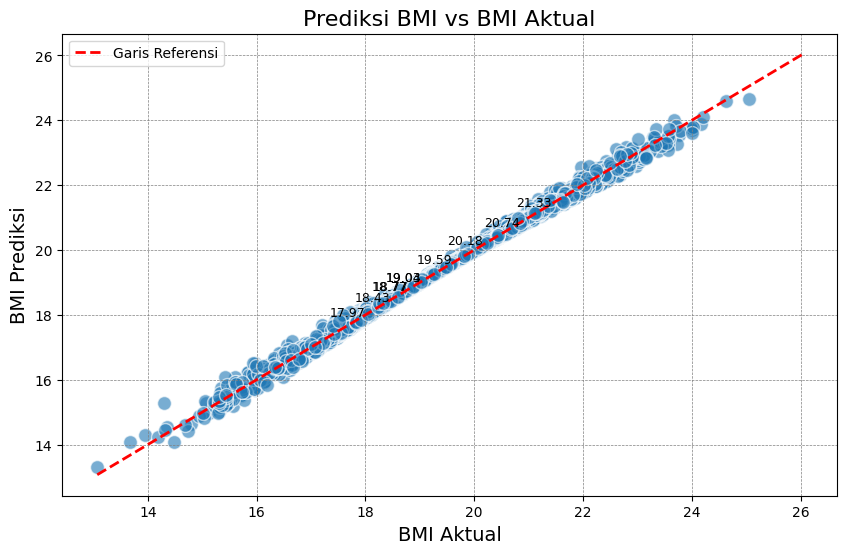

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Membuat plot scatter
plt.figure(figsize=(10, 6))  # Ukuran figure yang lebih besar
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='w', s=100)  # 's' untuk ukuran titik dan 'alpha' untuk transparansi

# Garis referensi (garis diagonal)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Garis Referensi')  # Lebar garis referensi

# Menambahkan label dan title
plt.xlabel('BMI Aktual', fontsize=14)
plt.ylabel('BMI Prediksi', fontsize=14)
plt.title('Prediksi BMI vs BMI Aktual', fontsize=16)

# Menambahkan grid untuk kemudahan membaca
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Menambahkan anotasi untuk beberapa titik
for i in range(0, len(y_test), int(len(y_test) / 10)):  # Menampilkan anotasi untuk 10 titik
    plt.annotate(f'{y_pred[i]:.2f}', (y_test.iloc[i], y_pred[i]), fontsize=9, ha='right')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()


In [ ]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Kekurangan Berat Badan'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Kelebihan Berat Badan'
    else:
        return 'Obesitas'

# Tambahkan kolom kategori ke DataFrame
bodyconvert['BMICategory'] = bodyconvert['BMI'].apply(categorize_bmi)

# Menampilkan beberapa baris untuk melihat kategori
print(bodyconvert[['Height(cm)', 'Weight(kg)', 'BMI', 'BMICategory']].head())


   Height(cm)  Weight(kg)        BMI             BMICategory
0    0.370095    0.376472  18.357609  Kekurangan Berat Badan
1    0.755447    0.629351  18.762615                  Normal
2    0.613158    0.807370  22.338940                  Normal
3    0.533683    0.692295  21.504569                  Normal
4    0.504856    0.713410  22.077625                  Normal


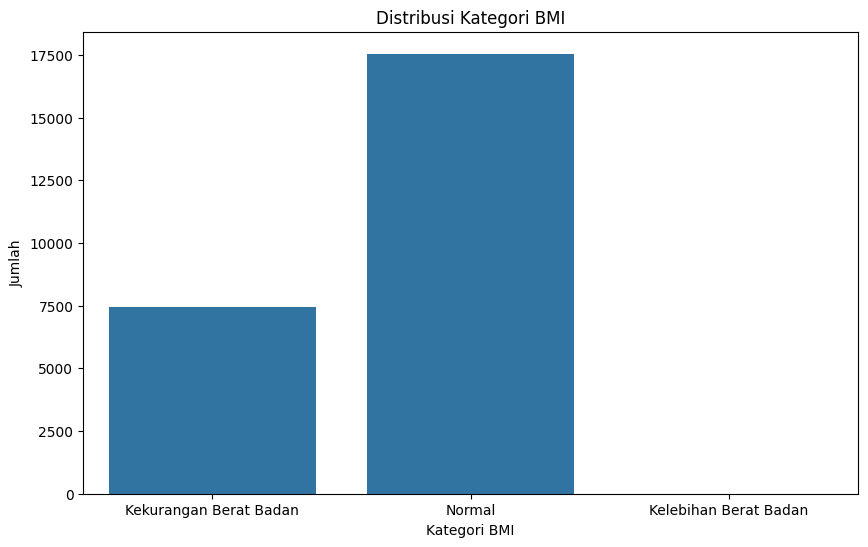

In [ ]:
import seaborn as sns

# Visualisasi distribusi kategori BMI
plt.figure(figsize=(10, 6))
sns.countplot(data=bodyconvert, x='BMICategory')
plt.title('Distribusi Kategori BMI')
plt.xlabel('Kategori BMI')
plt.ylabel('Jumlah')
plt.show()